In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("netflix.csv", encoding='utf-8', na_values=['', ' ', '######'])

# Fix special character encoding issues
def fix_encoding(text):
    try:
        return text.encode('latin1').decode('utf-8')
    except:
        return text

df = df.applymap(lambda x: fix_encoding(x) if isinstance(x, str) else x)

# Clean 'duration' to separate numeric and unit
df[['duration_number', 'duration_unit']] = df['duration'].str.extract(r'(\d+)\s*(\w+)', expand=True)
df['duration_number'] = pd.to_numeric(df['duration_number'], errors='coerce')

# Parse 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Optional: fill missing values
df.fillna({
    'director': 'Unknown',
    'cast': 'Unknown',
    'country': 'Unknown',
    'rating': 'Not Rated'
}, inplace=True)

# Show basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          8807 non-null   object        
 1   type             8807 non-null   object        
 2   title            8807 non-null   object        
 3   director         8807 non-null   object        
 4   cast             8807 non-null   object        
 5   country          8807 non-null   object        
 6   date_added       8709 non-null   datetime64[ns]
 7   release_year     8807 non-null   int64         
 8   rating           8807 non-null   object        
 9   duration         8804 non-null   object        
 10  listed_in        8807 non-null   object        
 11  description      8807 non-null   object        
 12  duration_number  8804 non-null   float64       
 13  duration_unit    8804 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(

<ipython-input-2-ab8ff31a5f7f>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: fix_encoding(x) if isinstance(x, str) else x)


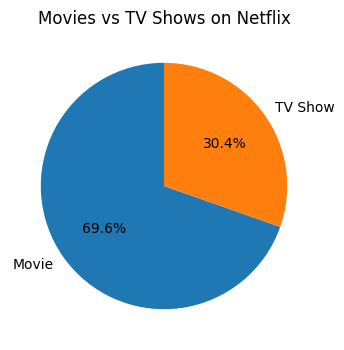

In [3]:
# 1. Ratio of Movies vs TV Shows
plt.figure(figsize=(6, 4))
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Movies vs TV Shows on Netflix')
plt.ylabel('')
plt.show()


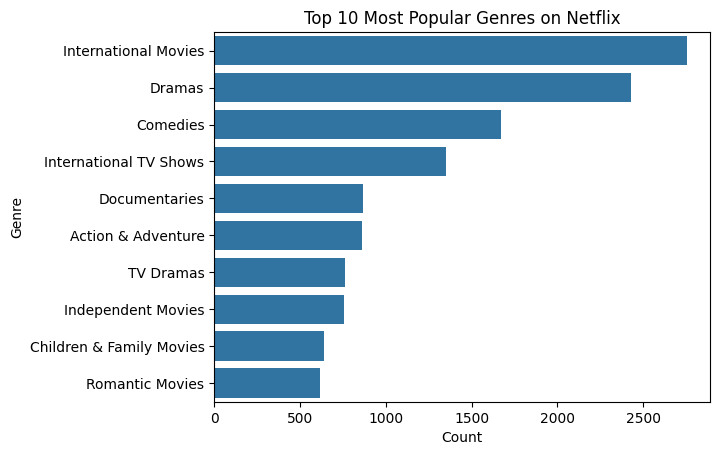

In [4]:
# 2. Most popular genres globally
from collections import Counter
genre_split = df['listed_in'].str.split(', ')
genre_counts = Counter([genre for sublist in genre_split.dropna() for genre in sublist])
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

sns.barplot(data=top_genres, x='Count', y='Genre')
plt.title('Top 10 Most Popular Genres on Netflix')
plt.show()


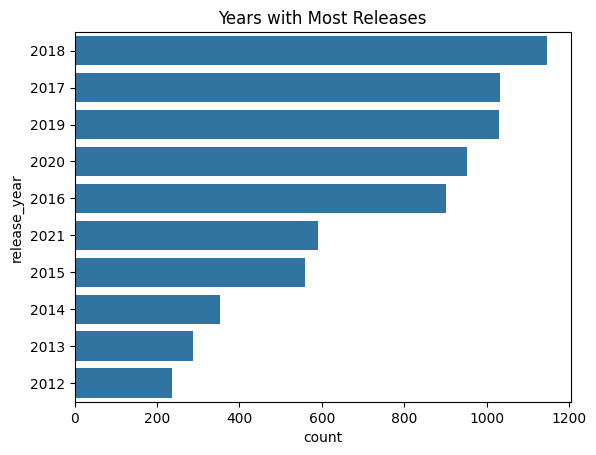

In [5]:
# 3. Years with most content released
sns.countplot(data=df, y='release_year', order=df['release_year'].value_counts().head(10).index)
plt.title('Years with Most Releases')
plt.show()


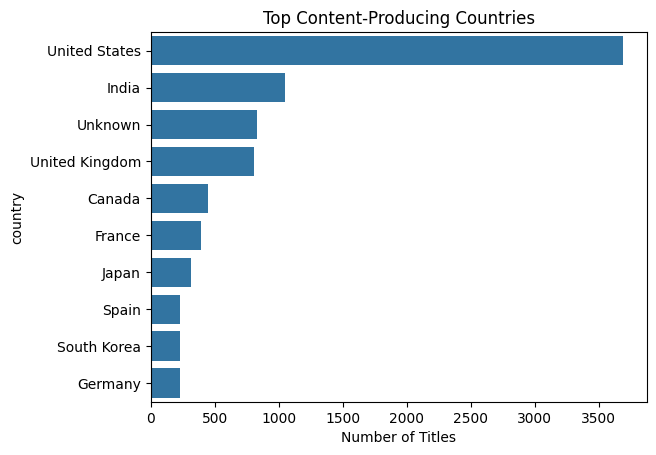

In [6]:
# 4. Top countries producing Netflix content
top_countries = df['country'].str.split(', ').explode().value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top Content-Producing Countries')
plt.xlabel('Number of Titles')
plt.show()


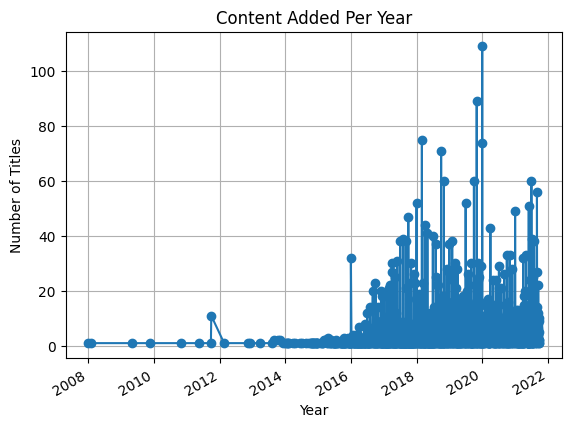

In [11]:
# 5. Trend of content added by year
yearly_addition = df['date_added'].value_counts().sort_index()
yearly_addition.plot(kind='line', marker='o')
plt.title('Content Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid()
plt.show()



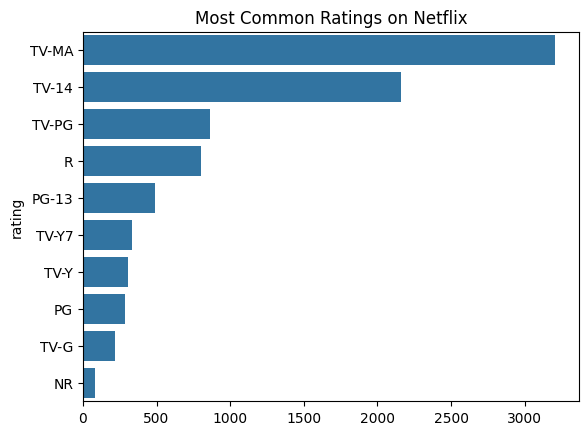

In [12]:
# 6. Most frequent ratings
rating_counts = df['rating'].value_counts().head(10)
sns.barplot(x=rating_counts.values, y=rating_counts.index)
plt.title('Most Common Ratings on Netflix')
plt.show()


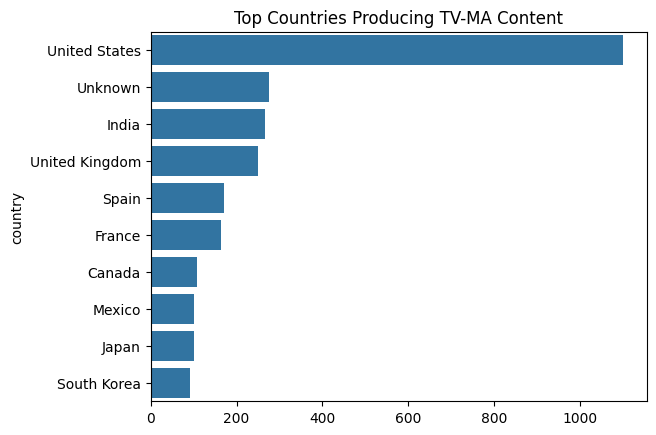

In [13]:
# 7. Countries producing more mature (TV-MA) content
mature = df[df['rating'] == 'TV-MA']
mature_countries = mature['country'].str.split(', ').explode().value_counts().head(10)
sns.barplot(x=mature_countries.values, y=mature_countries.index)
plt.title('Top Countries Producing TV-MA Content')
plt.show()


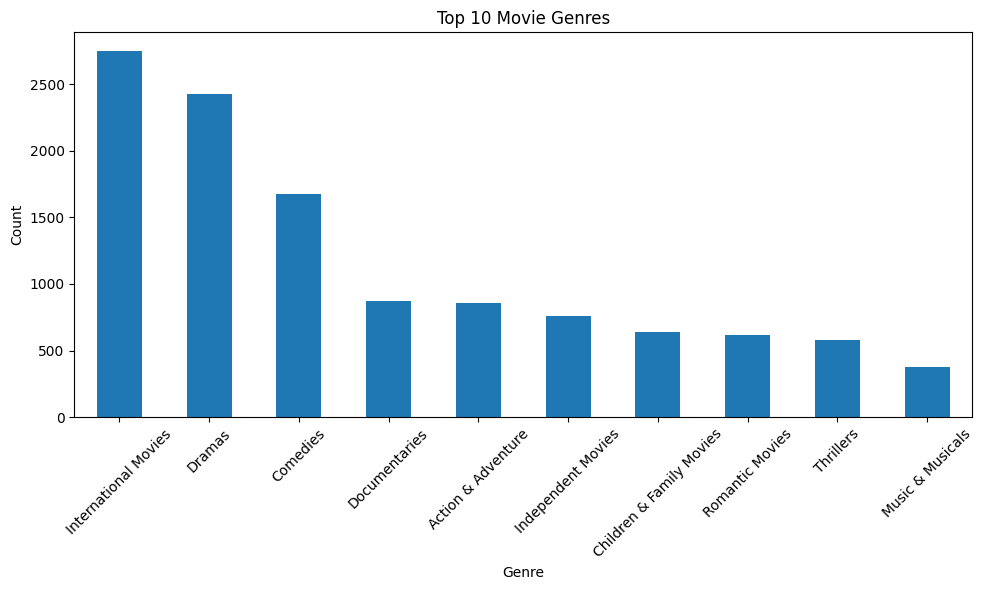

In [15]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Explode genre list and count by type
df_exploded = df.copy()
df_exploded['listed_in'] = df_exploded['listed_in'].str.split(', ')
df_exploded = df_exploded.explode('listed_in')

# Count genres per type
genre_by_type = df_exploded.groupby(['type', 'listed_in']).size().unstack(fill_value=0)

# Plot top 10 genres by Movies
top10_genres = genre_by_type.loc['Movie'].sort_values(ascending=False).head(10)

# Plot as bar chart
top10_genres.plot(kind='bar', figsize=(10,6))
plt.title('Top 10 Movie Genres')
plt.ylabel('Count')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

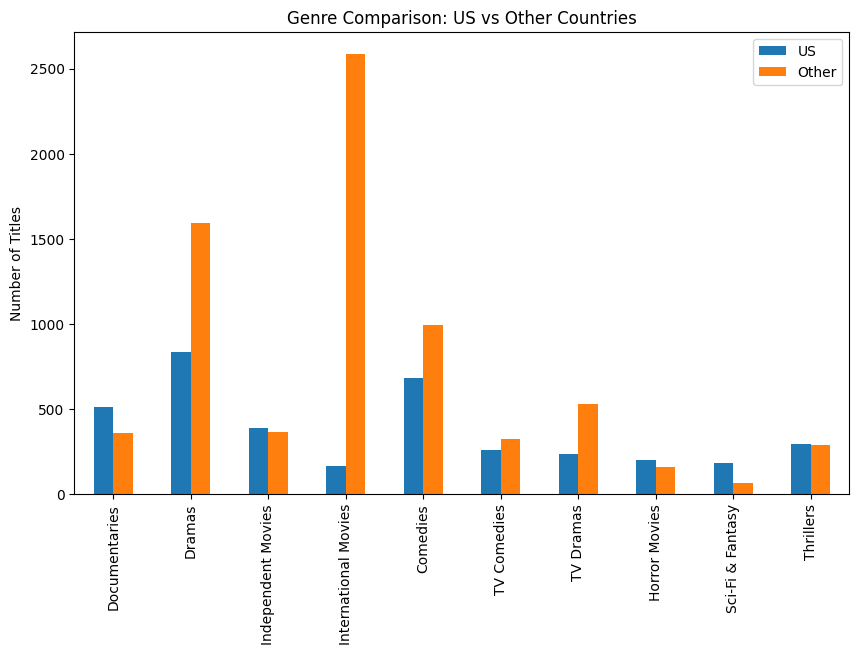

In [16]:
# 9. Genres in US vs Other Countries
us_data = df[df['country'].str.contains('United States', na=False)]
non_us_data = df[~df['country'].str.contains('United States', na=False)]
us_genres = Counter([i for sub in us_data['listed_in'].str.split(', ') for i in sub])
non_us_genres = Counter([i for sub in non_us_data['listed_in'].str.split(', ') for i in sub])
genre_compare = pd.DataFrame({'US': us_genres, 'Other': non_us_genres}).fillna(0).astype(int)
genre_compare.head(10).plot(kind='bar', figsize=(10,6))
plt.title('Genre Comparison: US vs Other Countries')
plt.ylabel('Number of Titles')
plt.show()


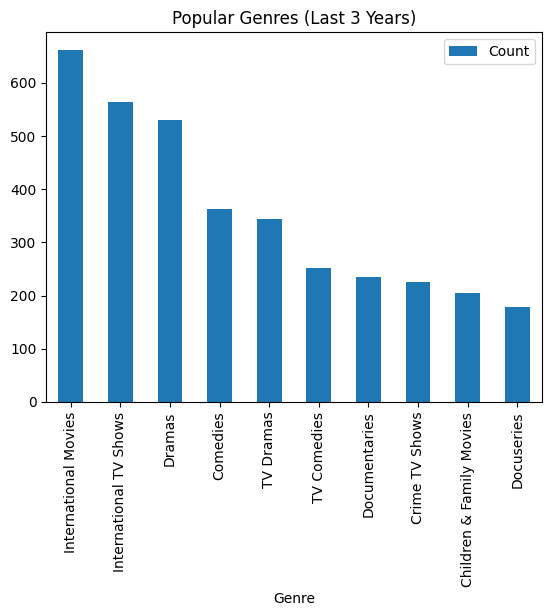

In [17]:
# 10. Popular genres in last 3 years
recent = df[df['release_year'] >= (df['release_year'].max() - 2)]
recent_genres = Counter([i for sub in recent['listed_in'].str.split(', ') for i in sub])
pd.DataFrame(recent_genres.most_common(10), columns=['Genre', 'Count']).plot(kind='bar', x='Genre', y='Count')
plt.title('Popular Genres (Last 3 Years)')
plt.show()


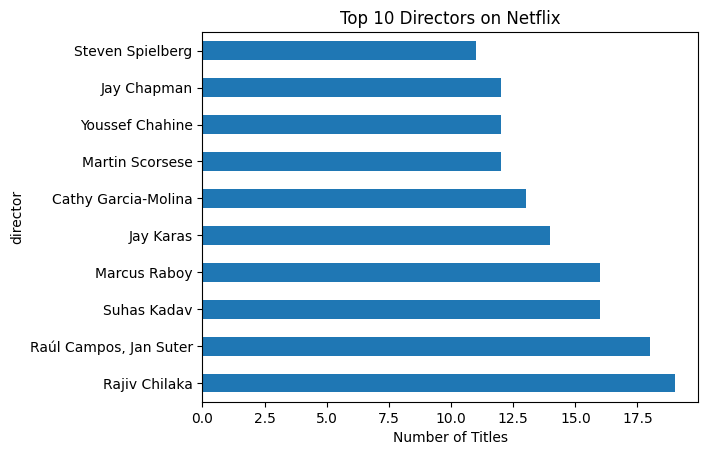

In [18]:
# 11. Top 10 directors
top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(10)
top_directors.plot(kind='barh')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.show()


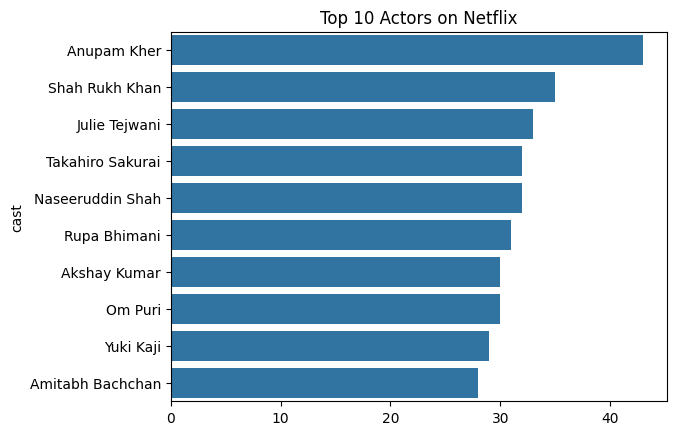

In [20]:

# 12. Most frequent actors
actor_list = df['cast'].str.split(', ').explode().value_counts().drop('Unknown').head(10)
sns.barplot(x=actor_list.values, y=actor_list.index)
plt.title('Top 10 Actors on Netflix')
plt.show()

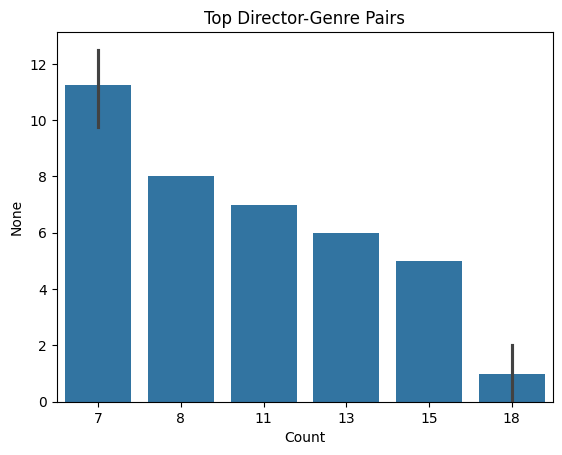

In [21]:
# 13. Frequent director-genre pairs
df_director_genre = df[df['director'] != 'Unknown']
df_director_genre = df_director_genre.explode('listed_in')
pairs = df_director_genre[['director', 'listed_in']].dropna()
top_pairs = pairs.value_counts().head(10).reset_index(name='Count')
sns.barplot(data=top_pairs, x='Count', y=pairs.index[:10].get_level_values(0))
plt.title('Top Director-Genre Pairs')
plt.show()


In [22]:
# 14. Titles with unknown director or cast
unknowns = df[(df['director'] == 'Unknown') | (df['cast'] == 'Unknown')]
print(f"Total titles with unknown director or cast: {len(unknowns)}")


Total titles with unknown director or cast: 3107


In [23]:
# 15. Average duration of movies
movie_durations = df[df['type'] == 'Movie']['duration'].str.extract('(\d+)').astype(float)
print(f"Average duration of Movies: {movie_durations.mean()[0]:.2f} minutes")


Average duration of Movies: 99.58 minutes


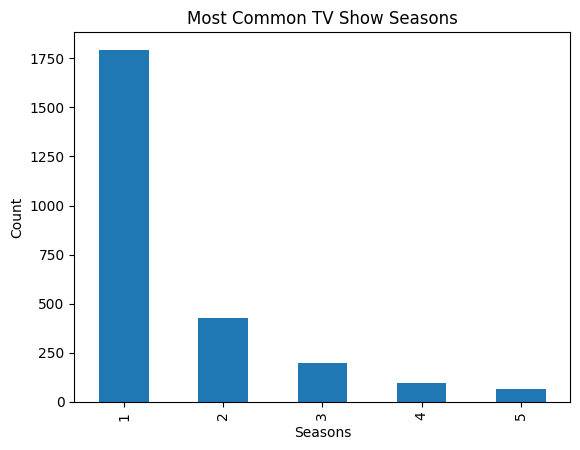

In [24]:
# 16. Most common number of TV Show seasons
tv_seasons = df[df['type'] == 'TV Show']['duration'].str.extract('(\d+)').astype(int)
tv_seasons[0].value_counts().head().plot(kind='bar')
plt.title('Most Common TV Show Seasons')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.show()


<ipython-input-25-dfd1f0bb0768>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration_minutes'] = df_movie['duration'].str.extract('(\d+)').astype(float)


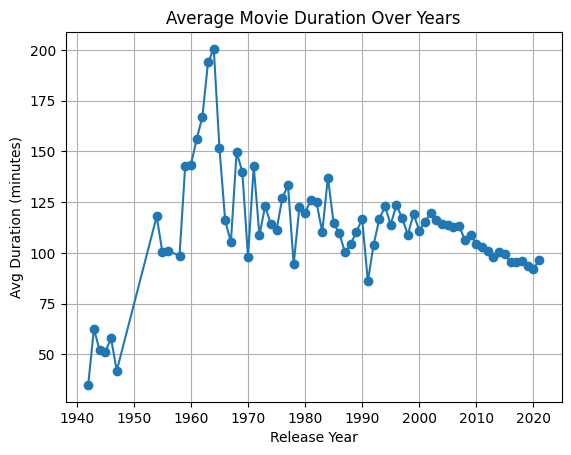

In [25]:

# 17. Movie duration trends over years
df_movie = df[df['type'] == 'Movie']
df_movie['duration_minutes'] = df_movie['duration'].str.extract('(\d+)').astype(float)
duration_trend = df_movie.groupby('release_year')['duration_minutes'].mean()
duration_trend.plot(marker='o')
plt.title('Average Movie Duration Over Years')
plt.xlabel('Release Year')
plt.ylabel('Avg Duration (minutes)')
plt.grid()
plt.show()

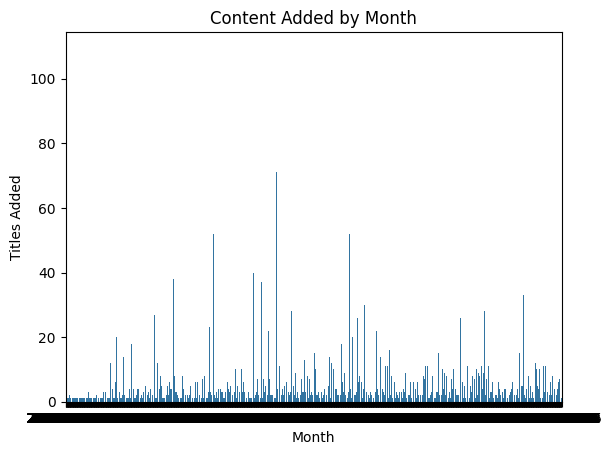

In [27]:
# 18. Month-wise content additions
month_adds = df['date_added'].value_counts().sort_index()
sns.barplot(x=month_adds.index, y=month_adds.values)
plt.title('Content Added by Month')
plt.xlabel('Month')
plt.ylabel('Titles Added')
plt.show()


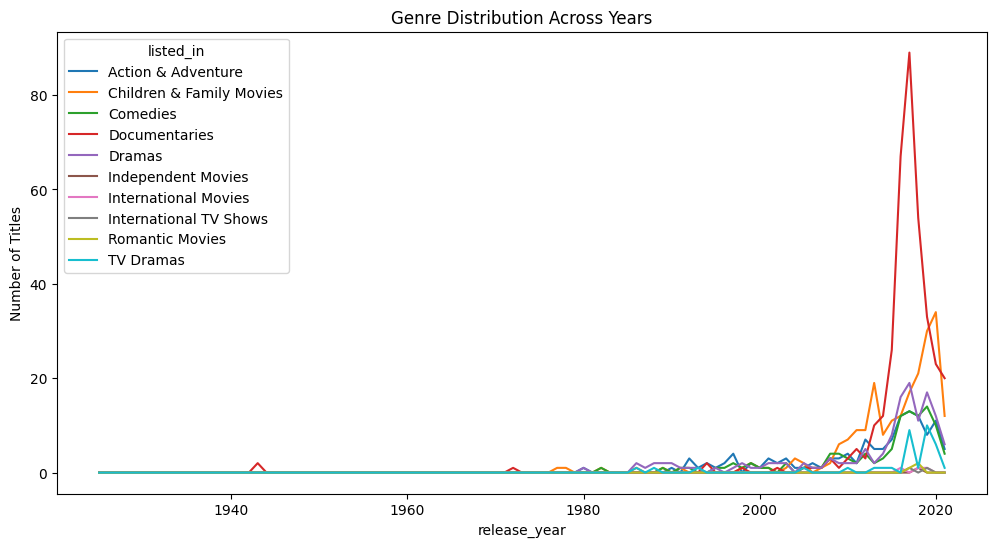

In [28]:
# 19. Genre distribution over years
year_genre = df[['release_year', 'listed_in']].dropna()
year_genre = year_genre.explode('listed_in')
top_years = year_genre.groupby(['release_year', 'listed_in']).size().unstack(fill_value=0)
top_years[[col for col in top_years.columns if col in top_genres['Genre'].values]].plot(figsize=(12,6))
plt.title('Genre Distribution Across Years')
plt.ylabel('Number of Titles')
plt.show()

In [29]:
# 20. Countries producing most content by genre
genre_country = df[['country', 'listed_in']].dropna()
genre_country = genre_country.explode('country').explode('listed_in')
top_by_genre = genre_country.groupby(['listed_in', 'country']).size().reset_index(name='count')
top_genre_countries = top_by_genre.groupby('listed_in').apply(lambda x: x.nlargest(1, 'count')).reset_index(drop=True)
print(top_genre_countries)

                                             listed_in        country  count
0                                   Action & Adventure  United States     64
1                   Action & Adventure, Anime Features        Unknown      1
2    Action & Adventure, Anime Features, Children &...          Japan      2
3    Action & Adventure, Anime Features, Classic Mo...          Japan      1
4    Action & Adventure, Anime Features, Horror Movies          Japan      1
..                                                 ...            ...    ...
509             TV Horror, TV Mysteries, Teen TV Shows  United States      1
510                           TV Horror, Teen TV Shows  United States      2
511                  TV Sci-Fi & Fantasy, TV Thrillers         Canada      1
512                                           TV Shows        Unknown      7
513                                          Thrillers  United States     43

[514 rows x 3 columns]


<ipython-input-29-22e4f0a2343b>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genre_countries = top_by_genre.groupby('listed_in').apply(lambda x: x.nlargest(1, 'count')).reset_index(drop=True)
